# HR Analytics: Employee Attrition & Workforce Insights
## Dataset: IBM HR Analytics Employee Attrition & Performance (Kaggle)    

### 02 - Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hr_cleaned.csv")
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employeecount,employee_number,...,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,tenure_group,age_group,overtime_flag,income_band,satisfaction_score
0,41,1,Travel Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,6,4,0,5,3-6,Mid,1,Low,2.333333
1,49,0,Travel Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,10,7,1,7,7-10,Senior,0,Low,2.666667
2,37,1,Travel Rarely,1373,Research & Development,2,2,Other,1,4,...,3,0,0,0,0,0-2,Mid,1,Low,3.333333
3,33,0,Travel Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,8,7,3,0,7-10,Mid,1,Low,3.333333
4,27,0,Travel Rarely,591,Research & Development,2,1,Medical,1,7,...,3,2,2,2,2,0-2,Young,0,Low,2.000000


In [3]:
# Overall Attrition Rate
overall_attrition = df['attrition'].sum()
overall_attrition

np.int64(237)

In [4]:
# Attrition by Department

Attr_Department= df.groupby('department')['attrition'].sum()
Attr_Department

department
Human Resources            12
Research & Development    133
Sales                      92
Name: attrition, dtype: int64

In [5]:
# Attrition by Job role

Attr_job_role= df.groupby('job_role')['attrition'].sum()
Attr_job_role

job_role
Healthcare Representative     9
Human Resources              12
Laboratory Technician        62
Manager                       5
Manufacturing Director       10
Research Director             2
Research Scientist           47
Sales Executive              57
Sales Representative         33
Name: attrition, dtype: int64

In [6]:
# Attrition by Age group

Attr_age_group= df.groupby('age_group')['attrition'].sum()
Attr_age_group

age_group
Mid       103
Senior     34
Young     100
Name: attrition, dtype: int64

In [7]:
# Attrition by Tenure group

Attr_tenure_group= df.groupby('tenure_group')['attrition'].sum()
Attr_tenure_group

tenure_group
0-2     102
10+      20
3-6      69
7-10     46
Name: attrition, dtype: int64

In [8]:
# Attrition by income band

Attr_income_band = df.groupby('income_band')['attrition'].sum()
Attr_income_band

income_band
High      5
Low     197
Mid      35
Name: attrition, dtype: int64

In [9]:
# Attrition by OverTime Flag

Attr_overtime_flag= df.groupby('overtime_flag')['attrition'].sum()
Attr_overtime_flag

overtime_flag
0    110
1    127
Name: attrition, dtype: int64

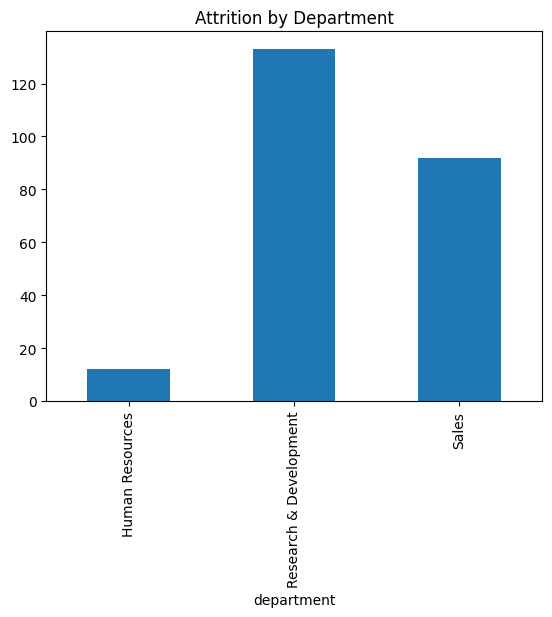

In [10]:
df.groupby('department')['attrition'].sum().plot(kind='bar')
plt.title('Attrition by Department')
plt.show()

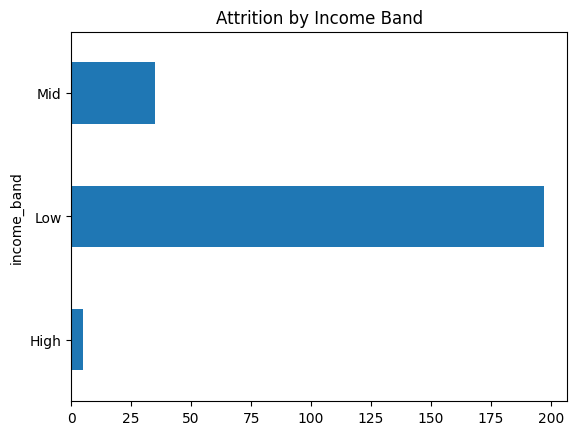

In [11]:
df.groupby('income_band')['attrition'].sum().plot(kind='barh')
plt.title('Attrition by Income Band')
plt.show()

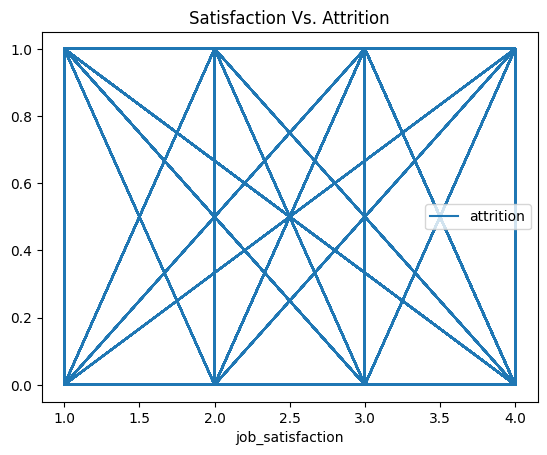

In [12]:
df.plot(kind='line', x= 'job_satisfaction', y= 'attrition', title= 'Satisfaction Vs. Attrition')
plt.show()

<Axes: >

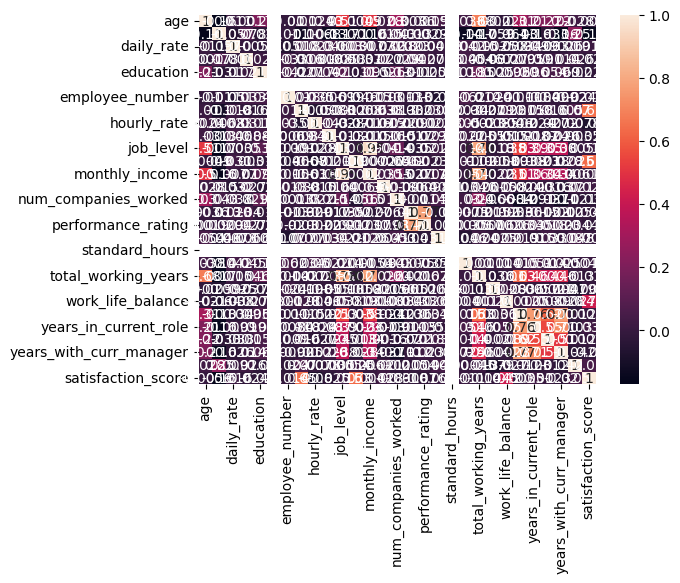

In [13]:
# Correlation heatmap(numeric)
df_corr= df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True)

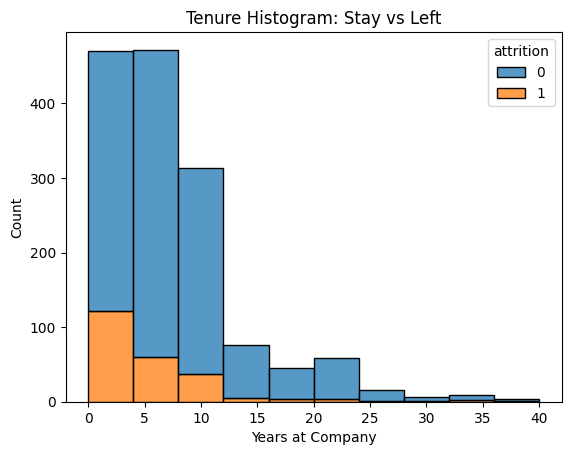

In [14]:
# Histogram comparing tenure distribution
sns.histplot(data=df, x='years_at_company', hue='attrition', multiple='stack', bins=10)
plt.title('Tenure Histogram: Stay vs Left')
plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.show()


### Analyzing key Patterns in employee attrition.

These factors are analyzed to understand their relationship with employee attrition. Identifying high-risk roles, age groups, and income bands helps highlight which employee segments are more likely to leave. Examining overtime and tenure provides insight into how workload and length of service influence attrition. Overall, these patterns help pinpoint the key drivers of employee turnover and guide targeted retention strategies

In [15]:
# High-risk income bands

df.groupby('income_band')[['job_satisfaction', 'attrition']].mean()

,job_satisfaction,attrition
income_band,,
High,2.691729,0.037594
Low,2.748393,0.180900
Mid,2.661290,0.141129


In [16]:
# overTime Effect

df.groupby('overtime_flag')[['job_satisfaction', 'attrition']].mean()

,job_satisfaction,attrition
overtime_flag,,
0,2.711575,0.104364
1,2.771635,0.305288


In [19]:
# Effect of Tenure
df.groupby('tenure_group')[['job_satisfaction', 'attrition']].mean()

,job_satisfaction,attrition
tenure_group,,
0-2,2.760234,0.298246
10+,2.719512,0.081301
3-6,2.700000,0.135294
7-10,2.744624,0.123656


In [20]:
# High-risk Age Group

df.groupby('age_group')[['job_satisfaction', 'attrition']].mean()

,job_satisfaction,attrition
age_group,,
Mid,2.749692,0.127004
Senior,2.699634,0.124542
Young,2.704663,0.259067


In [21]:
# High-risk roles
df.groupby('job_role')[['job_satisfaction', 'attrition']].mean()

,job_satisfaction,attrition
job_role,,
Healthcare Representative,2.786260,0.068702
Human Resources,2.557692,0.230769
Laboratory Technician,2.691120,0.239382
Manager,2.705882,0.049020
Manufacturing Director,2.682759,0.068966
Research Director,2.700000,0.025000
Research Scientist,2.773973,0.160959
Sales Executive,2.754601,0.174847
Sales Representative,2.734940,0.397590


## Pattern Visualization

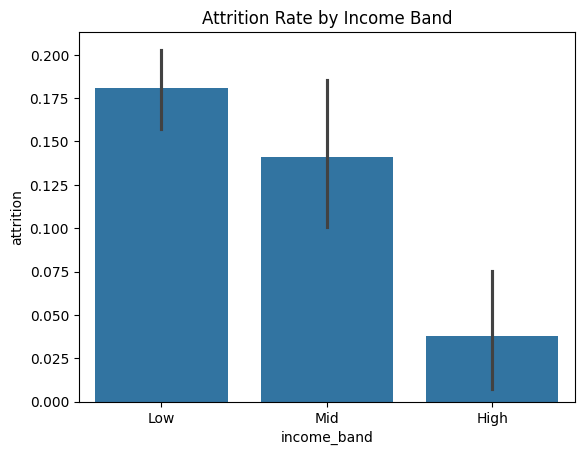

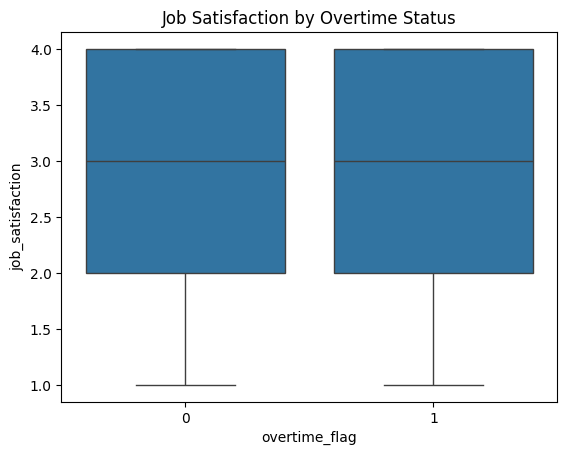

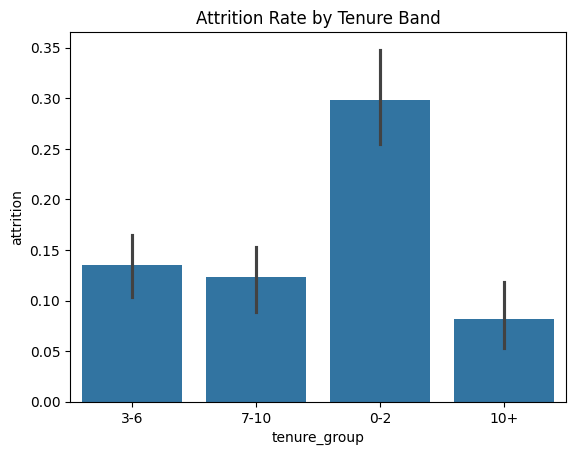

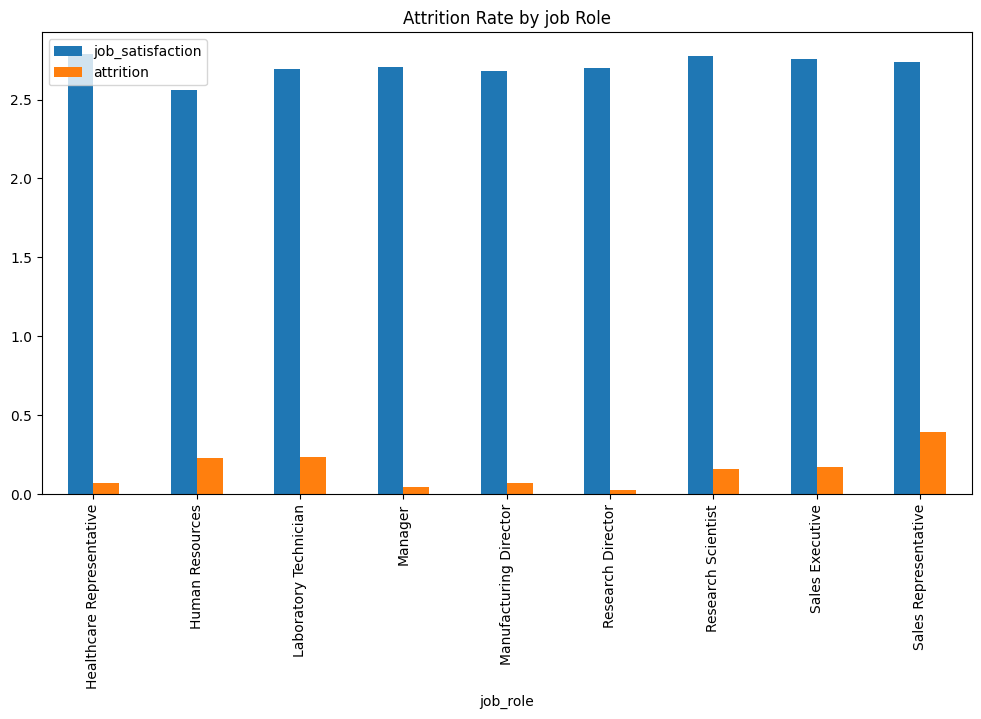

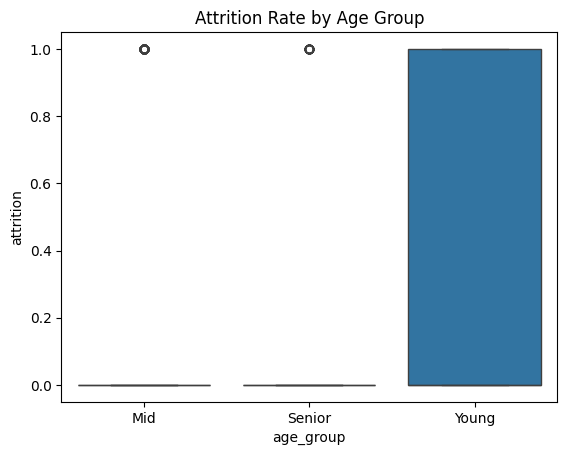

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# High-risk Income Band
sns.barplot(x='income_band', y='attrition', data=df)
plt.title('Attrition Rate by Income Band')
plt.show()

# Effect of Overtime
sns.boxplot(x='overtime_flag', y='job_satisfaction', data=df)
plt.title('Job Satisfaction by Overtime Status')
plt.show()

# Effect of Tenure
sns.barplot(x='tenure_group', y='attrition', data=df)
plt.title('Attrition Rate by Tenure Band')
plt.show()

# High-risk Roles
high_risk_role = df.groupby('job_role')[['job_satisfaction', 'attrition']].mean()
high_risk_role.plot(kind='bar', figsize=(12, 6))
plt.title('Attrition Rate by job Role')
plt.show()

# High-risk Age Group
sns.boxplot(x='age_group', y='attrition', data=df)
plt.title('Attrition Rate by Age Group')
plt.show()